from mm_include import mm,mermaid

In [61]:
mm("""
flowchart LR
    subgraph Inputs["Inputs"]
        A1["$$ x_1$$"]
        A2["$$ x_2$$"]
        ADOT[".."]
        AN["$$ x_n$$"]
    end
    subgraph subGraph1["Weights"]
        w1(("$$ w_1 $$"))
        w2(("$$ w_2 $$"))
        wDOT[".."]
        wN(("$$ w_n $$"))
    end
    C{"$$ z = \sum_{i=1}^n x_i w_i + b $$"}
    y["output"]
    step["$$\phi(z) \\text{\ 'step function'}$$"]

    %% Comments after double percent signs
    A1 --> w1 
    w1--> C
    A2 --> w2
    w2 --> C
    ADOT --> wDOT
    wDOT --> C
    AN --> wN
    wN --> C
    C --> step
    step ==> y
""")

#### The 2 key functions are a weighted sum and a step function
$$ 
    z = \sum_{i=1}^n x_i w_i + b 
$$

$$ 
    output = \begin{cases}
        1 & \text{if }\ z > T \text{\, where T is some threshold }
        \\-1 & \text{otherwise}
        \end{cases}     
$$

In [28]:
import numpy as np
import copy
from matplotlib import pyplot as plt
import random
%matplotlib inline

In [29]:

#generate a training card with a rectangular section marked positive 
def training_card(size=8, horizontal_partition = True, vertical_partition = True):
    X = np.zeros((size*size,2))
    Y = np.zeros([X.shape[0]])
    
    s = 0
    t_y = random.uniform(size/4,3*size/4) if horizontal_partition else -1
    t_x = random.uniform(0,size) if vertical_partition else -1  
    print("card_t:",t_x,t_y)
    for i in range (0,size):    
        for j in range (0,size):
            X[s]=[i,j] 
            Y[s]= 1 if (j> t_y and i>t_x) else -1
            s+=1
    return (X,Y)            

def draw_card(X,Y):
    plt.figure(figsize=(0.5,0.5))
    for i, x in enumerate(X):
        if Y[i] > 0:
            plt.scatter(x[0], x[1], s=50, marker='s', color='green',linewidths=2)
        # Plot the positive samples
        else:
            plt.scatter(x[0], x[1], s=50, marker='s', color='red', linewidths=2)
        

card_t: -1 3.7959437543066765


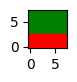

Prediction: Vertical (0.0) GT:Vertical(-1.0)
Mismatch
Prediction: Vertical (0.0) GT:Vertical(-1.0)
Mismatch
Prediction: Vertical (0.0) GT:Vertical(-1.0)
Mismatch
Prediction: Vertical (0.0) GT:Vertical(-1.0)
Mismatch
Prediction: Vertical (0.0) GT:Horizontal(1.0)
Mismatch
Prediction: Vertical (0.0) GT:Horizontal(1.0)
Mismatch
Prediction: Vertical (0.0) GT:Horizontal(1.0)
Mismatch
Prediction: Vertical (0.0) GT:Horizontal(1.0)
Mismatch
Prediction: Vertical (0.0) GT:Vertical(-1.0)
Mismatch
Prediction: Vertical (0.0) GT:Vertical(-1.0)
Mismatch
Prediction: Vertical (0.0) GT:Vertical(-1.0)
Mismatch
Prediction: Vertical (0.0) GT:Vertical(-1.0)
Mismatch
Prediction: Vertical (0.0) GT:Horizontal(1.0)
Mismatch
Prediction: Vertical (0.0) GT:Horizontal(1.0)
Mismatch
Prediction: Vertical (0.0) GT:Horizontal(1.0)
Mismatch
Prediction: Vertical (0.0) GT:Horizontal(1.0)
Mismatch
Prediction: Vertical (0.0) GT:Vertical(-1.0)
Mismatch
Prediction: Vertical (0.0) GT:Vertical(-1.0)
Mismatch
Prediction: Vertical

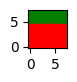

Prediction: Vertical (-47.0) GT:Vertical(-1.0)
Prediction: Vertical (-32.0) GT:Vertical(-1.0)
Prediction: Vertical (-17.0) GT:Vertical(-1.0)
Prediction: Vertical (-2.0) GT:Vertical(-1.0)
Prediction: Horizontal (13.0) GT:Vertical(-1.0)
Mismatch
Prediction: Horizontal (28.0) GT:Vertical(-1.0)
Mismatch
Prediction: Horizontal (43.0) GT:Horizontal(1.0)
Prediction: Horizontal (58.0) GT:Horizontal(1.0)
Prediction: Vertical (-48.0) GT:Vertical(-1.0)
Prediction: Vertical (-33.0) GT:Vertical(-1.0)
Prediction: Vertical (-18.0) GT:Vertical(-1.0)
Prediction: Vertical (-3.0) GT:Vertical(-1.0)
Prediction: Horizontal (12.0) GT:Vertical(-1.0)
Mismatch
Prediction: Horizontal (27.0) GT:Vertical(-1.0)
Mismatch
Prediction: Horizontal (42.0) GT:Horizontal(1.0)
Prediction: Horizontal (57.0) GT:Horizontal(1.0)
Prediction: Vertical (-49.0) GT:Vertical(-1.0)
Prediction: Vertical (-34.0) GT:Vertical(-1.0)
Prediction: Vertical (-19.0) GT:Vertical(-1.0)
Prediction: Vertical (-4.0) GT:Vertical(-1.0)
Prediction: Hor

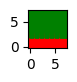

Prediction: Vertical (-66.0) GT:Vertical(-1.0)
Prediction: Vertical (-53.0) GT:Vertical(-1.0)
Prediction: Vertical (-40.0) GT:Vertical(-1.0)
Prediction: Vertical (-27.0) GT:Horizontal(1.0)
Mismatch
Prediction: Vertical (-14.0) GT:Horizontal(1.0)
Mismatch
Prediction: Vertical (-1.0) GT:Horizontal(1.0)
Mismatch
Prediction: Horizontal (12.0) GT:Horizontal(1.0)
Prediction: Horizontal (25.0) GT:Horizontal(1.0)
Prediction: Vertical (-67.0) GT:Vertical(-1.0)
Prediction: Vertical (-54.0) GT:Vertical(-1.0)
Prediction: Vertical (-41.0) GT:Vertical(-1.0)
Prediction: Vertical (-28.0) GT:Horizontal(1.0)
Mismatch
Prediction: Vertical (-15.0) GT:Horizontal(1.0)
Mismatch
Prediction: Vertical (-2.0) GT:Horizontal(1.0)
Mismatch
Prediction: Horizontal (11.0) GT:Horizontal(1.0)
Prediction: Horizontal (24.0) GT:Horizontal(1.0)
Prediction: Vertical (-68.0) GT:Vertical(-1.0)
Prediction: Vertical (-55.0) GT:Vertical(-1.0)
Prediction: Vertical (-42.0) GT:Vertical(-1.0)
Prediction: Vertical (-29.0) GT:Horizonta

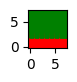

Prediction: Vertical (-63.0) GT:Vertical(-1.0)
Prediction: Vertical (-40.0) GT:Vertical(-1.0)
Prediction: Vertical (-17.0) GT:Vertical(-1.0)
Prediction: Horizontal (6.0) GT:Horizontal(1.0)
Prediction: Horizontal (29.0) GT:Horizontal(1.0)
Prediction: Horizontal (52.0) GT:Horizontal(1.0)
Prediction: Horizontal (75.0) GT:Horizontal(1.0)
Prediction: Horizontal (98.0) GT:Horizontal(1.0)
Prediction: Vertical (-63.0) GT:Vertical(-1.0)
Prediction: Vertical (-40.0) GT:Vertical(-1.0)
Prediction: Vertical (-17.0) GT:Vertical(-1.0)
Prediction: Horizontal (6.0) GT:Horizontal(1.0)
Prediction: Horizontal (29.0) GT:Horizontal(1.0)
Prediction: Horizontal (52.0) GT:Horizontal(1.0)
Prediction: Horizontal (75.0) GT:Horizontal(1.0)
Prediction: Horizontal (98.0) GT:Horizontal(1.0)
Prediction: Vertical (-63.0) GT:Vertical(-1.0)
Prediction: Vertical (-40.0) GT:Vertical(-1.0)
Prediction: Vertical (-17.0) GT:Vertical(-1.0)
Prediction: Horizontal (6.0) GT:Horizontal(1.0)
Prediction: Horizontal (29.0) GT:Horizont

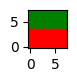

Prediction: Vertical (-63.0) GT:Vertical(-1.0)
Prediction: Vertical (-40.0) GT:Vertical(-1.0)
Prediction: Vertical (-17.0) GT:Vertical(-1.0)
Prediction: Horizontal (6.0) GT:Vertical(-1.0)
Mismatch
Prediction: Horizontal (29.0) GT:Vertical(-1.0)
Mismatch
Prediction: Horizontal (52.0) GT:Horizontal(1.0)
Prediction: Horizontal (75.0) GT:Horizontal(1.0)
Prediction: Horizontal (98.0) GT:Horizontal(1.0)
Prediction: Vertical (-63.0) GT:Vertical(-1.0)
Prediction: Vertical (-40.0) GT:Vertical(-1.0)
Prediction: Vertical (-17.0) GT:Vertical(-1.0)
Prediction: Horizontal (6.0) GT:Vertical(-1.0)
Mismatch
Prediction: Horizontal (29.0) GT:Vertical(-1.0)
Mismatch
Prediction: Horizontal (52.0) GT:Horizontal(1.0)
Prediction: Horizontal (75.0) GT:Horizontal(1.0)
Prediction: Horizontal (98.0) GT:Horizontal(1.0)
Prediction: Vertical (-63.0) GT:Vertical(-1.0)
Prediction: Vertical (-40.0) GT:Vertical(-1.0)
Prediction: Vertical (-17.0) GT:Vertical(-1.0)
Prediction: Horizontal (6.0) GT:Vertical(-1.0)
Mismatch
P

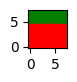

Prediction: Vertical (-65.0) GT:Vertical(-1.0)
Prediction: Vertical (-49.0) GT:Vertical(-1.0)
Prediction: Vertical (-33.0) GT:Vertical(-1.0)
Prediction: Vertical (-17.0) GT:Vertical(-1.0)
Prediction: Vertical (-1.0) GT:Vertical(-1.0)
Prediction: Horizontal (15.0) GT:Vertical(-1.0)
Mismatch
Prediction: Horizontal (31.0) GT:Horizontal(1.0)
Prediction: Horizontal (47.0) GT:Horizontal(1.0)
Prediction: Vertical (-65.0) GT:Vertical(-1.0)
Prediction: Vertical (-49.0) GT:Vertical(-1.0)
Prediction: Vertical (-33.0) GT:Vertical(-1.0)
Prediction: Vertical (-17.0) GT:Vertical(-1.0)
Prediction: Vertical (-1.0) GT:Vertical(-1.0)
Prediction: Horizontal (15.0) GT:Vertical(-1.0)
Mismatch
Prediction: Horizontal (31.0) GT:Horizontal(1.0)
Prediction: Horizontal (47.0) GT:Horizontal(1.0)
Prediction: Vertical (-65.0) GT:Vertical(-1.0)
Prediction: Vertical (-49.0) GT:Vertical(-1.0)
Prediction: Vertical (-33.0) GT:Vertical(-1.0)
Prediction: Vertical (-17.0) GT:Vertical(-1.0)
Prediction: Vertical (-1.0) GT:Ver

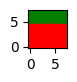

Prediction: Vertical (-66.0) GT:Vertical(-1.0)
Prediction: Vertical (-53.0) GT:Vertical(-1.0)
Prediction: Vertical (-40.0) GT:Vertical(-1.0)
Prediction: Vertical (-27.0) GT:Vertical(-1.0)
Prediction: Vertical (-14.0) GT:Vertical(-1.0)
Prediction: Vertical (-1.0) GT:Vertical(-1.0)
Prediction: Horizontal (12.0) GT:Horizontal(1.0)
Prediction: Horizontal (25.0) GT:Horizontal(1.0)
Prediction: Vertical (-67.0) GT:Vertical(-1.0)
Prediction: Vertical (-54.0) GT:Vertical(-1.0)
Prediction: Vertical (-41.0) GT:Vertical(-1.0)
Prediction: Vertical (-28.0) GT:Vertical(-1.0)
Prediction: Vertical (-15.0) GT:Vertical(-1.0)
Prediction: Vertical (-2.0) GT:Vertical(-1.0)
Prediction: Horizontal (11.0) GT:Horizontal(1.0)
Prediction: Horizontal (24.0) GT:Horizontal(1.0)
Prediction: Vertical (-68.0) GT:Vertical(-1.0)
Prediction: Vertical (-55.0) GT:Vertical(-1.0)
Prediction: Vertical (-42.0) GT:Vertical(-1.0)
Prediction: Vertical (-29.0) GT:Vertical(-1.0)
Prediction: Vertical (-16.0) GT:Vertical(-1.0)
Predict

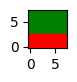

Prediction: Vertical (-66.0) GT:Vertical(-1.0)
Prediction: Vertical (-53.0) GT:Vertical(-1.0)
Prediction: Vertical (-40.0) GT:Vertical(-1.0)
Prediction: Vertical (-27.0) GT:Vertical(-1.0)
Prediction: Vertical (-14.0) GT:Horizontal(1.0)
Mismatch
Prediction: Vertical (-1.0) GT:Horizontal(1.0)
Mismatch
Prediction: Horizontal (12.0) GT:Horizontal(1.0)
Prediction: Horizontal (25.0) GT:Horizontal(1.0)
Prediction: Vertical (-67.0) GT:Vertical(-1.0)
Prediction: Vertical (-54.0) GT:Vertical(-1.0)
Prediction: Vertical (-41.0) GT:Vertical(-1.0)
Prediction: Vertical (-28.0) GT:Vertical(-1.0)
Prediction: Vertical (-15.0) GT:Horizontal(1.0)
Mismatch
Prediction: Vertical (-2.0) GT:Horizontal(1.0)
Mismatch
Prediction: Horizontal (11.0) GT:Horizontal(1.0)
Prediction: Horizontal (24.0) GT:Horizontal(1.0)
Prediction: Vertical (-68.0) GT:Vertical(-1.0)
Prediction: Vertical (-55.0) GT:Vertical(-1.0)
Prediction: Vertical (-42.0) GT:Vertical(-1.0)
Prediction: Vertical (-29.0) GT:Vertical(-1.0)
Prediction: Ve

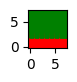

Prediction: Vertical (-66.0) GT:Vertical(-1.0)
Prediction: Vertical (-47.0) GT:Vertical(-1.0)
Prediction: Vertical (-28.0) GT:Vertical(-1.0)
Prediction: Vertical (-9.0) GT:Horizontal(1.0)
Mismatch
Prediction: Horizontal (10.0) GT:Horizontal(1.0)
Prediction: Horizontal (29.0) GT:Horizontal(1.0)
Prediction: Horizontal (48.0) GT:Horizontal(1.0)
Prediction: Horizontal (67.0) GT:Horizontal(1.0)
Prediction: Vertical (-65.0) GT:Vertical(-1.0)
Prediction: Vertical (-46.0) GT:Vertical(-1.0)
Prediction: Vertical (-27.0) GT:Vertical(-1.0)
Prediction: Vertical (-8.0) GT:Horizontal(1.0)
Mismatch
Prediction: Horizontal (11.0) GT:Horizontal(1.0)
Prediction: Horizontal (30.0) GT:Horizontal(1.0)
Prediction: Horizontal (49.0) GT:Horizontal(1.0)
Prediction: Horizontal (68.0) GT:Horizontal(1.0)
Prediction: Vertical (-64.0) GT:Vertical(-1.0)
Prediction: Vertical (-45.0) GT:Vertical(-1.0)
Prediction: Vertical (-26.0) GT:Vertical(-1.0)
Prediction: Vertical (-7.0) GT:Horizontal(1.0)
Mismatch
Prediction: Horiz

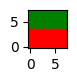

Prediction: Vertical (-65.0) GT:Vertical(-1.0)
Prediction: Vertical (-43.0) GT:Vertical(-1.0)
Prediction: Vertical (-21.0) GT:Vertical(-1.0)
Prediction: Horizontal (1.0) GT:Vertical(-1.0)
Mismatch
Prediction: Horizontal (23.0) GT:Vertical(-1.0)
Mismatch
Prediction: Horizontal (45.0) GT:Horizontal(1.0)
Prediction: Horizontal (67.0) GT:Horizontal(1.0)
Prediction: Horizontal (89.0) GT:Horizontal(1.0)
Prediction: Vertical (-64.0) GT:Vertical(-1.0)
Prediction: Vertical (-42.0) GT:Vertical(-1.0)
Prediction: Vertical (-20.0) GT:Vertical(-1.0)
Prediction: Horizontal (2.0) GT:Vertical(-1.0)
Mismatch
Prediction: Horizontal (24.0) GT:Vertical(-1.0)
Mismatch
Prediction: Horizontal (46.0) GT:Horizontal(1.0)
Prediction: Horizontal (68.0) GT:Horizontal(1.0)
Prediction: Horizontal (90.0) GT:Horizontal(1.0)
Prediction: Vertical (-63.0) GT:Vertical(-1.0)
Prediction: Vertical (-41.0) GT:Vertical(-1.0)
Prediction: Vertical (-19.0) GT:Vertical(-1.0)
Prediction: Horizontal (3.0) GT:Vertical(-1.0)
Mismatch
P

In [5]:
import sys, site
sys.path.insert(0,"..") 
from perceptron import perceptron as tron

#generate 10 cards and train to detect horizontal partitions 
weights = np.zeros(2)
bias = 0
for c in range (0,10):
    (X,Y) = training_card(vertical_partition=False)
    draw_card(X,Y)
    plt.show()
    (weights,bias) = tron.perceptron(X,Y,weights, bias, predict=True)
    print(f"Weights => {weights}, bias={bias}\n{'-'*40}\n")    